In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [189]:
df = pd.read_csv("wine_sales_data.csv", delimiter=',')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [191]:
df.describe().round(2)

,Unnamed: 0,points,price
count,150930.00,150930.00,137235.00
mean,75464.50,87.89,33.13
std,43569.88,3.22,36.32
min,0.00,80.00,4.00
25%,37732.25,86.00,16.00
50%,75464.50,88.00,24.00
75%,113196.75,90.00,40.00
max,150929.00,100.00,2300.00


In [192]:
len(df['province'].unique())

456

In [193]:
df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [194]:
df[df['country'] == 'Portugal']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
64,64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
74,74,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba
91,91,Portugal,"The local Baga grape, better known for produci...",Marquês de Marialva Rosé Bruto,86,12.0,Beira Atlantico,NaN,NaN,Baga,Adega de Cantanhede
94,94,Portugal,This family-owned estate has produced an immed...,Muros de Vinha,86,10.0,Douro,NaN,NaN,Portuguese Red,Quinta do Portal
110,110,Portugal,This state-owned estate of forests and vineyar...,Companhia das Lezírias Herdade de Catapereiro ...,86,12.0,Tejo,NaN,NaN,Portuguese Red,Wines & Winemakers
...,...,...,...,...,...,...,...,...,...,...,...
149624,149624,Portugal,"An easy, fresh, ripe style, with dried fruits ...",Presidential 20-year old tawny,84,50.0,Port,NaN,NaN,Port,C. da Silva
149631,149631,Portugal,"This is a very old 40-year old, with some hars...",40-year old tawny,84,130.0,Port,NaN,NaN,Port,Poças
149636,149636,Portugal,Oreo eaters will enjoy the aromas of this wine...,30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia
150784,150784,Portugal,"A powerful, solid wine, packed with luscious f...",Quinta de Vargellas,90,42.0,Portugal,NaN,NaN,Port,Taylor Fladgate


In [195]:
df_v = df[df['province'] == "Vinho Verde"]
df_v

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [196]:
df_v.describe()

,Unnamed: 0,points,price
count,396.000000,396.000000,310.000000
mean,70480.558081,86.409091,11.400000
std,42469.897042,2.491366,4.821205
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.000000
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


In [197]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 277 to 143575
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   396 non-null    int64  
 1   country      396 non-null    object 
 2   description  396 non-null    object 
 3   designation  301 non-null    object 
 4   points       396 non-null    int64  
 5   price        310 non-null    float64
 6   province     396 non-null    object 
 7   region_1     0 non-null      object 
 8   region_2     0 non-null      object 
 9   variety      396 non-null    object 
 10  winery       396 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ KB


In [198]:
df_v["price"].isna().sum()

86

In [199]:
df_v["price"].fillna(df_v['price'].mean())

277       35.0
993       10.0
994        9.0
1378      11.4
1558      10.0
          ... 
141129     9.0
141143     8.0
141148     6.0
143472     9.0
143575    15.0
Name: price, Length: 396, dtype: float64

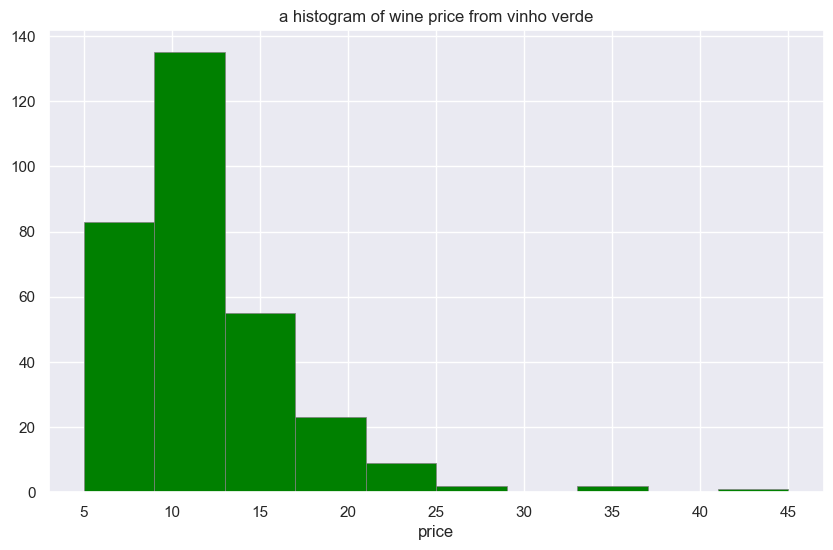

In [200]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of wine price from vinho verde")
plt.xlabel("price")

plt.hist(df_v["price"], color='green',
         edgecolor='grey', linewidth=0.5)
plt.show() 

In [292]:
bool_list = df_v["price"] > 20
df_v[bool_list]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
6621,6621,Portugal,This is a delicious refreshing wine with great...,NaN,88,21.0,Vinho Verde,NaN,NaN,Alvarinho,Quinta de Soalheiro
6819,6819,Portugal,This is a delicious refreshing wine with great...,NaN,88,21.0,Vinho Verde,NaN,NaN,Alvarinho,Quinta de Soalheiro
34191,34191,Portugal,This is a delicious refreshing wine with great...,NaN,88,21.0,Vinho Verde,NaN,NaN,Alvarinho,Quinta de Soalheiro
34239,34239,Portugal,This is a delicious refreshing wine with great...,NaN,88,21.0,Vinho Verde,NaN,NaN,Alvarinho,Quinta de Soalheiro
37081,37081,Portugal,"A rich and weighty wine, the Alvarinho fruit r...",Portal do Fidalgo,92,33.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
38529,38529,Portugal,"Still young, this wine brings out the ripe and...",Lua Cheia em Vinhas Velhas Nostalgia,91,22.0,Vinho Verde,NaN,NaN,Alvarinho,Wines & Winemakers
41684,41684,Portugal,"A delicious tight, crisp and mineral wine that...",Aphros Aether,89,21.0,Vinho Verde,NaN,NaN,Portuguese White,Casal Paço Padreiro
42648,42648,Portugal,The extra year in bottle has given this ripe a...,QM Vinhas Velhas,89,45.0,Vinho Verde,NaN,NaN,Alvarinho,Quintas de Melgaço
72854,72854,Portugal,"This crisp, bright sparkler gets depth of flav...",Aphros Reserva Bruto,86,23.0,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro


In [294]:
df_v.describe()

,Unnamed: 0,points,price
count,396.000000,396.000000,310.000000
mean,70480.558081,86.409091,11.400000
std,42469.897042,2.491366,4.821205
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.000000
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


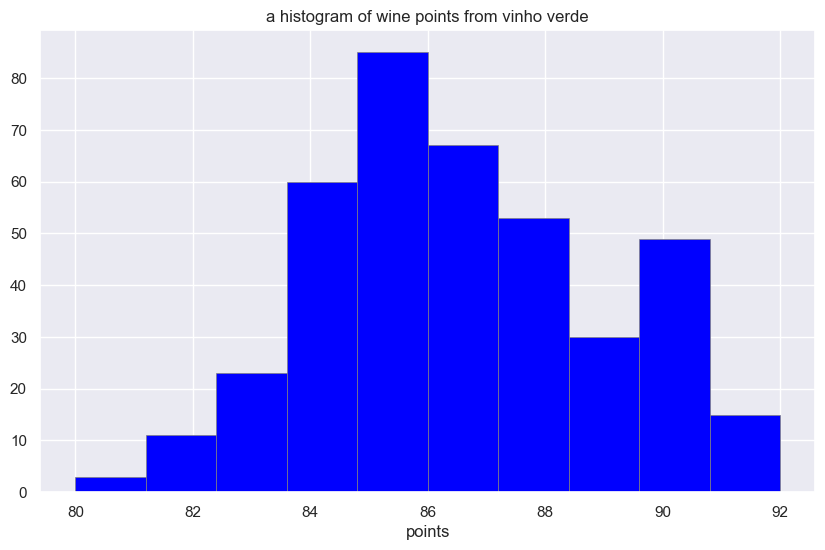

In [201]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of wine points from vinho verde")
plt.xlabel("points")

plt.hist(df_v["points"], color='blue',
         edgecolor='grey', linewidth=0.5)
plt.show() 

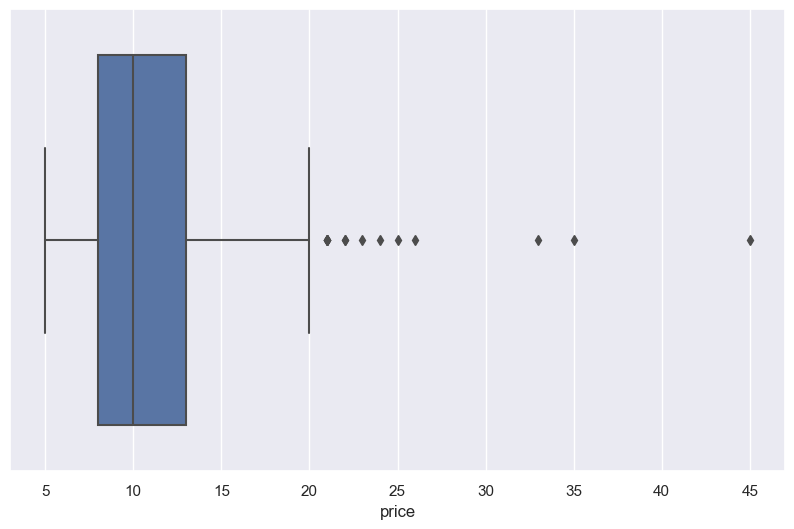

In [202]:
plt.figure(figsize=(10,6))
plt.subplot()
sns.boxplot(x='price', data=df_v)
plt.show()

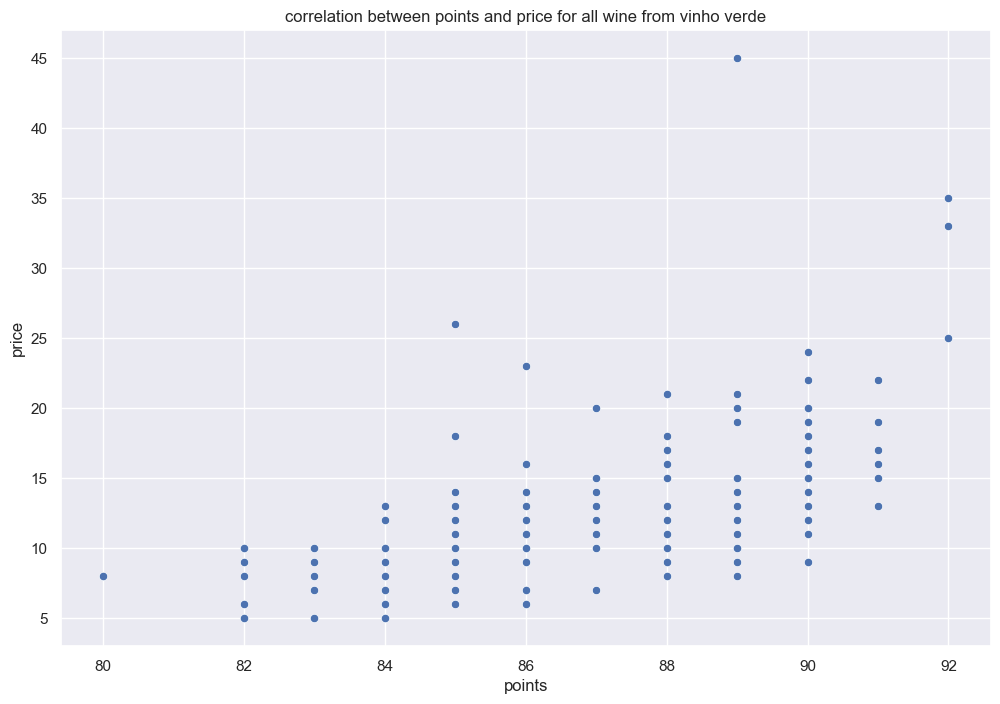

In [288]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "points", y = "price", data = df_v )
plt.xlabel("points")
plt.ylabel("price")
plt.title("correlation between points and price for all wine from vinho verde")
plt.show()

In [298]:
df_v[df_v["points"]>= 91].describe()

,Unnamed: 0,points,price
count,15.000000,15.000000,10.000000
mean,69255.266667,91.200000,20.800000
std,51701.296698,0.414039,7.927449
min,277.000000,91.000000,13.000000
25%,24910.500000,91.000000,15.250000
50%,73317.000000,91.000000,18.000000
75%,123182.000000,91.000000,24.250000
max,136085.000000,92.000000,35.000000


remove outliers

In [204]:
df_v.describe()
# median is 10

,Unnamed: 0,points,price
count,396.000000,396.000000,310.000000
mean,70480.558081,86.409091,11.400000
std,42469.897042,2.491366,4.821205
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.000000
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


In [205]:
df_v

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [206]:
Q1 = df_v['price'].quantile(0.25)
Q3 = df_v['price'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 is: ", Q1, "/ Q3 is: ", Q3, "IQR is: ", IQR)

#df_v_filterd = df_v['price'] < (Q1 - 1.5 * IQR)
#df_v_filterd

Q1 is:  8.0 / Q3 is:  13.0 IQR is:  5.0


In [207]:
upper_outliers = Q3 + (1.5*IQR)
lower_outliers = Q1 - (1.5*IQR)
print(f"upper outliers are > ", upper_outliers)
print(f"lower outliers are > ", lower_outliers)
print(len(df_v['price']> upper_outliers))

upper outliers are >  20.5
lower outliers are >  0.5
396


In [208]:
df_new = df_v.query('price < @upper_outliers')
df_new

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [209]:
df_new["variety"].unique()

array(['Portuguese White', 'Rosé', 'Portuguese Red', 'Alvarinho',
       'Arinto', 'Loureiro', 'Portuguese Rosé', 'Avesso', 'Azal',
       'Vinhão', 'White Blend'], dtype=object)

In [251]:
df_new.replace({"variety":     
{
                      "Portuguese White":"white",
                      'Rosé' : "rose", 
                      'Portuguese Red' : "red",
                      'Alvarinho': "white",
                      'Arinto': "white", 
                      'Loureiro': "white", 
                      'Portuguese Rosé' : "rose",
                      'Avesso': "white", 
                      'Azal': "white",
                      'Vinhão': "red",
                      'White Blend': "white"
}})


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine type
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,rose,Caves Campelo,rose
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,white,Casa de Vila Nova,white
...,...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,white,Adega Cooperativa Ponte de Lima,white
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,white,Casa de Vila Verde,white
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,white,Borges,white
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,white,Casa de Vila Verde,white


In [252]:
df_new["variety"].value_counts()

white     253
rose       32
red         8
"white      3
Name: variety, dtype: int64

In [212]:
df_new.describe()

,Unnamed: 0,points,price
count,296.000000,296.000000,296.000000
mean,71480.233108,86.219595,10.722973
std,43001.844674,2.452758,3.452969
min,993.000000,80.000000,5.000000
25%,33113.000000,84.000000,8.000000
50%,73226.000000,86.000000,10.000000
75%,110078.500000,88.000000,13.000000
max,143575.000000,91.000000,20.000000


In [260]:
df_v.describe()

,Unnamed: 0,points,price
count,396.000000,396.000000,310.000000
mean,70480.558081,86.409091,11.400000
std,42469.897042,2.491366,4.821205
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.000000
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


the price range is between 5 and 20 euro
points range is between 80 and 92.


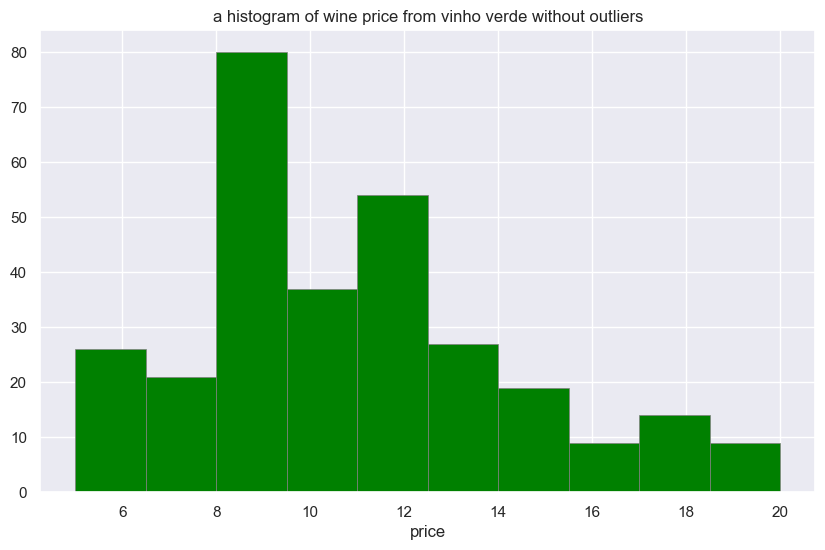

In [229]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of wine price from vinho verde without outliers")
plt.xlabel("price")

plt.hist(df_new["price"], color='green',
         edgecolor='grey', linewidth=0.5)
plt.show() 

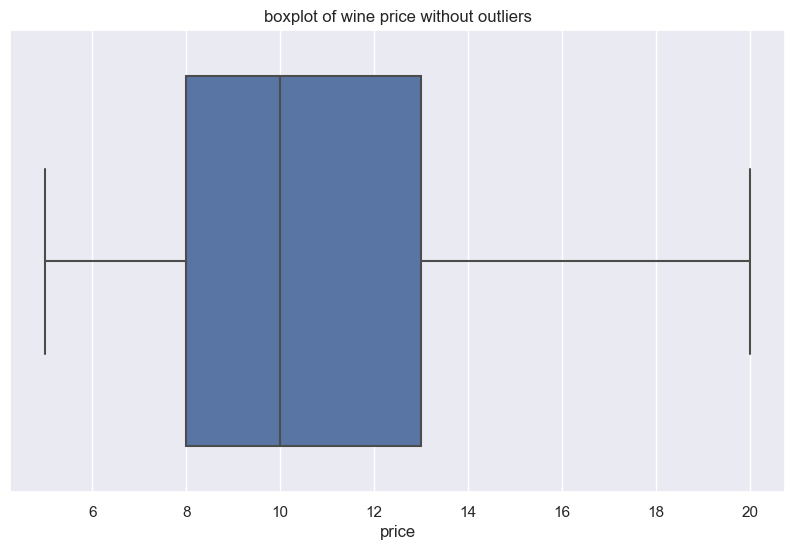

In [230]:
plt.figure(figsize=(10,6))
plt.subplot()
sns.boxplot(x='price', data=df_new)
plt.title("boxplot of wine price without outliers")
plt.show()

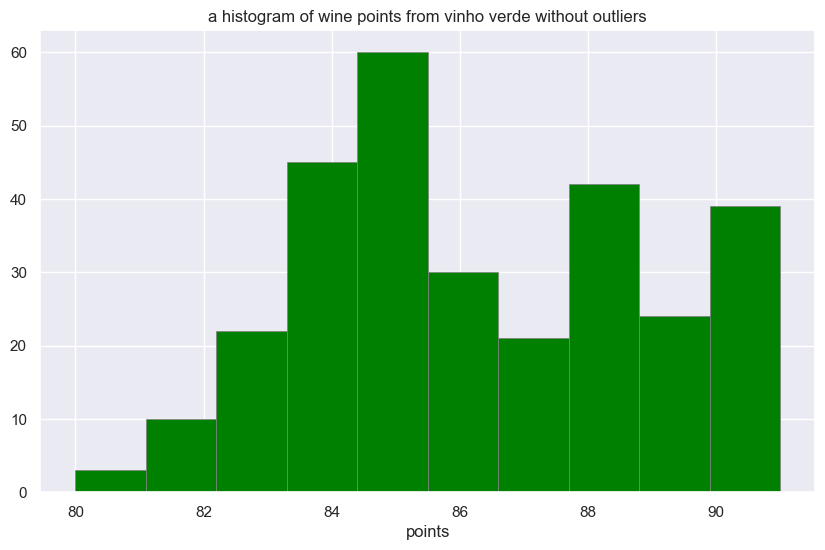

In [231]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of wine points from vinho verde without outliers")
plt.xlabel("points")

plt.hist(df_new["points"], color='green',
         edgecolor='grey', linewidth=0.5)
plt.show() 

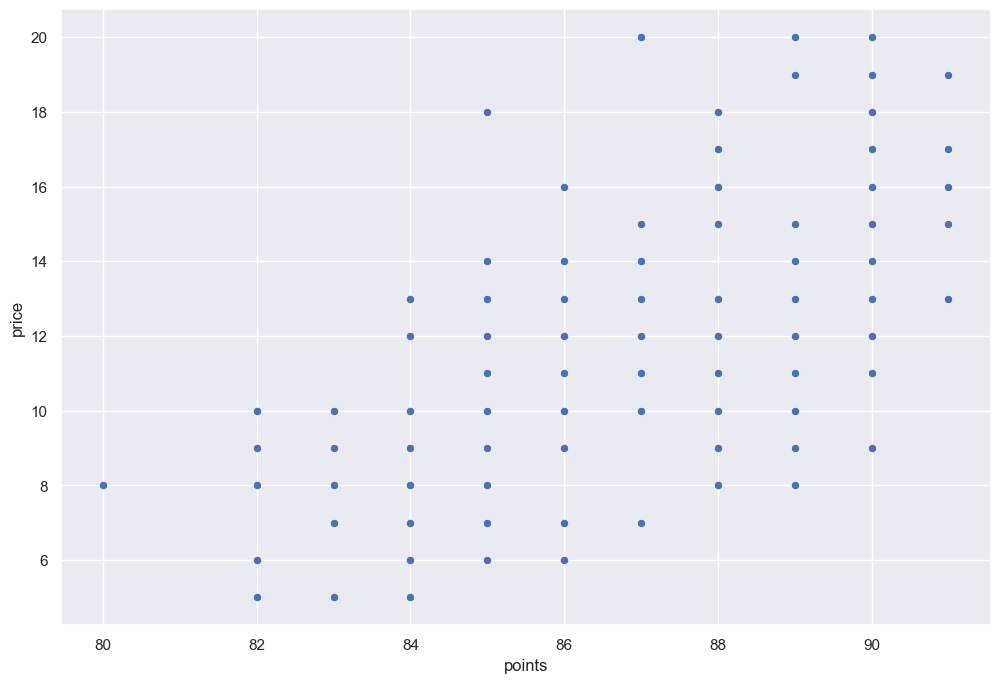

In [216]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "points", y = "price", data = df_new, )
plt.xlabel("points")
plt.ylabel("price")
plt.show()

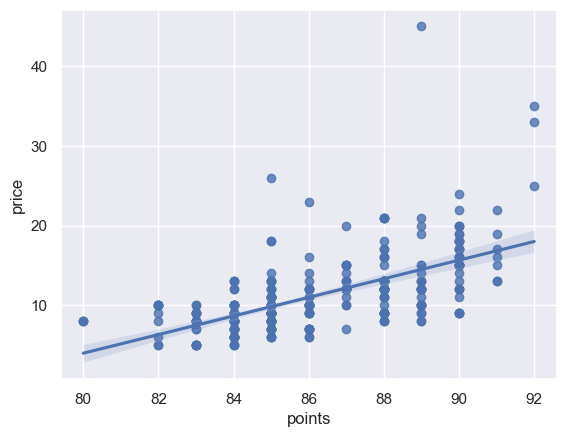

In [299]:
sns.regplot(x="points", y="price", data=df_v)
plt.show()

In [272]:
df_white = df_new[df_new['variety'] == "white"]
df_white


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine type
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,white,Casa de Vila Nova,white
2136,2136,Portugal,There is a lightly yeasty character to this wi...,Três Castas,82,10.0,Vinho Verde,NaN,NaN,white,Caves Campelo,white
...,...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,white,Adega Cooperativa Ponte de Lima,white
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,white,Casa de Vila Verde,white
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,white,Borges,white
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,white,Casa de Vila Verde,white


In [285]:
df_white.describe()

,Unnamed: 0,points,price
count,253.000000,253.000000,253.000000
mean,73156.841897,86.557312,10.849802
std,43566.692402,2.360740,3.471135
min,993.000000,80.000000,5.000000
25%,34687.000000,85.000000,8.000000
50%,74645.000000,86.000000,10.000000
75%,111937.000000,88.000000,13.000000
max,143575.000000,91.000000,20.000000


white wine 

In [273]:
df_red = df_new[df_new['variety'] == "red"]
df_red

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,wine type
1841,1841,Portugal,"High-acid red wine is not for everyone, but th...",Campelo Tinto,84,10.0,Vinho Verde,NaN,NaN,red,Caves Campelo,red
11269,11269,Portugal,"Tight with shocking acidity, this wine confirm...",NaN,82,10.0,Vinho Verde,NaN,NaN,red,Campelo,red
38359,38359,Portugal,"Tight with shocking acidity, this wine confirm...",NaN,82,10.0,Vinho Verde,NaN,NaN,red,Campelo,red
64728,64728,Portugal,"They say red Vinho Verde is an acquired taste,...",Tinto,83,5.0,Vinho Verde,NaN,NaN,red,Campelo,red
81576,81576,Portugal,This biodynamic estate produces an amazingly i...,Afros Tinto,88,17.0,Vinho Verde,NaN,NaN,red,Casal Paço Padreiro,red
104662,104662,Portugal,If any producer is going to make sense of Vinh...,Aphros,88,18.0,Vinho Verde,NaN,NaN,red,Casal Paço Padreiro,red
116328,116328,Portugal,"They say red Vinho Verde is an acquired taste,...",Tinto,83,5.0,Vinho Verde,NaN,NaN,red,Campelo,red
120078,120078,Portugal,"They say red Vinho Verde is an acquired taste,...",Tinto,83,5.0,Vinho Verde,NaN,NaN,red,Campelo,red


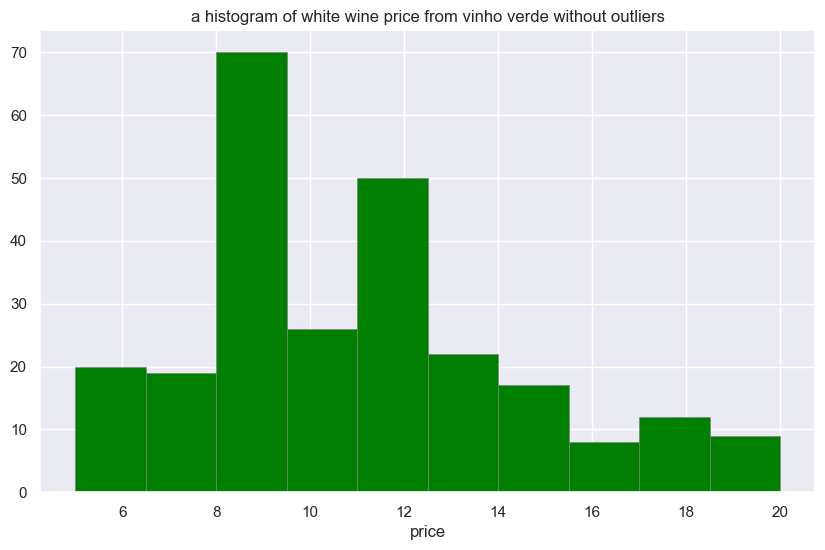

In [274]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of white wine price from vinho verde without outliers")
plt.xlabel("price")

plt.hist(df_white["price"] , color='green',
         edgecolor='grey', linewidth=0.5)
plt.show() 

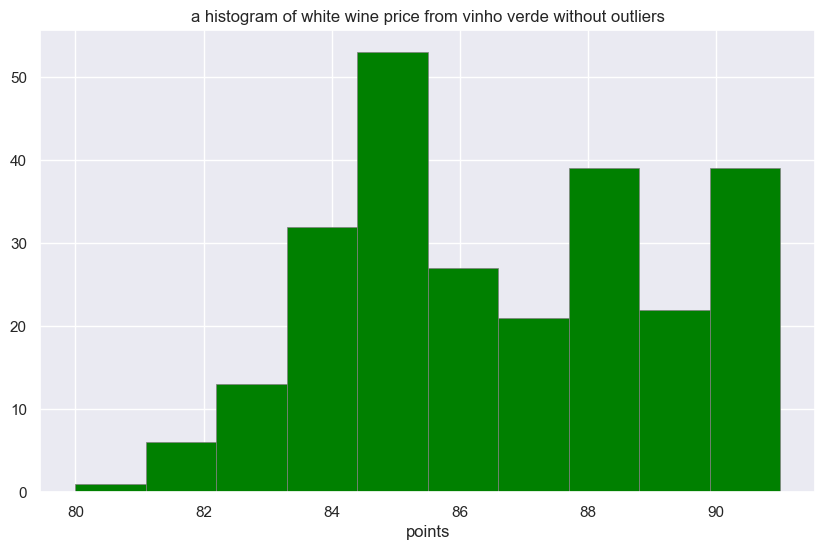

In [279]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of white wine price from vinho verde without outliers")
plt.xlabel("points")

plt.hist(df_white["points"] , color='green',
         edgecolor='grey', linewidth=0.5)
plt.show() 

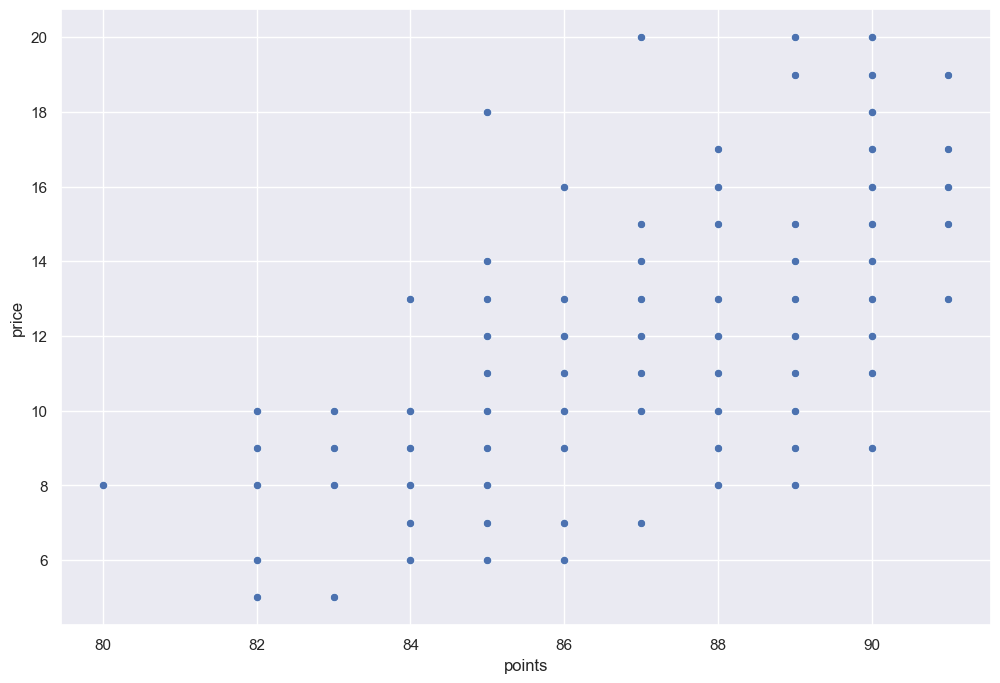

In [282]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "points", y = "price", data = df_white, )
plt.xlabel("points")
plt.ylabel("price")
plt.show()

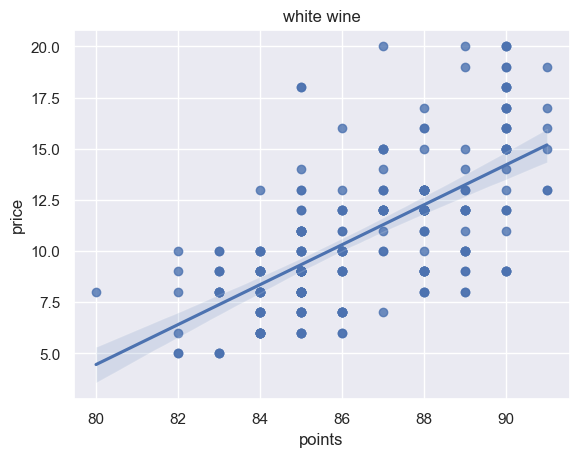

In [302]:
sns.regplot(x="points", y="price", data=df_white)
plt.title("white wine")
plt.show()

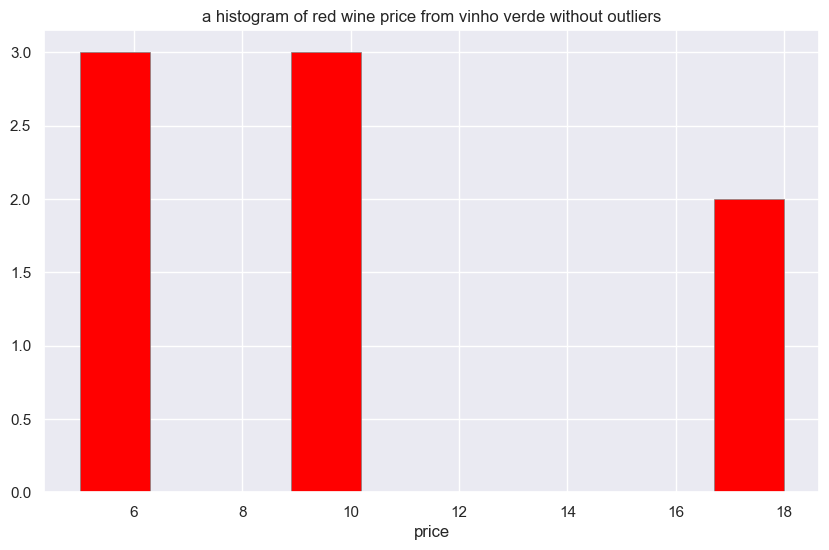

In [280]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of red wine price from vinho verde without outliers")
plt.xlabel("price")

plt.hist(df_red["price"] , color='red',
         edgecolor='grey', linewidth=0.5)
plt.show() 

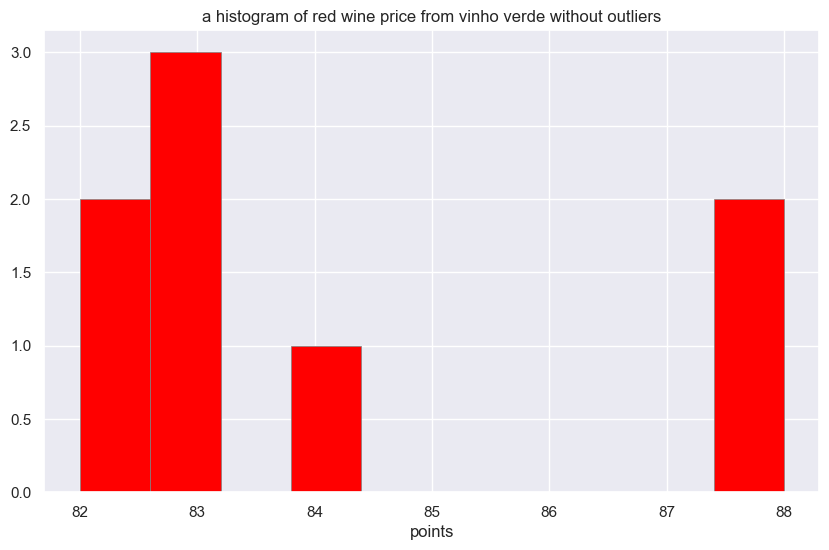

In [281]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of red wine price from vinho verde without outliers")
plt.xlabel("points")

plt.hist(df_red["points"] , color='red',
         edgecolor='grey', linewidth=0.5)
plt.show() 

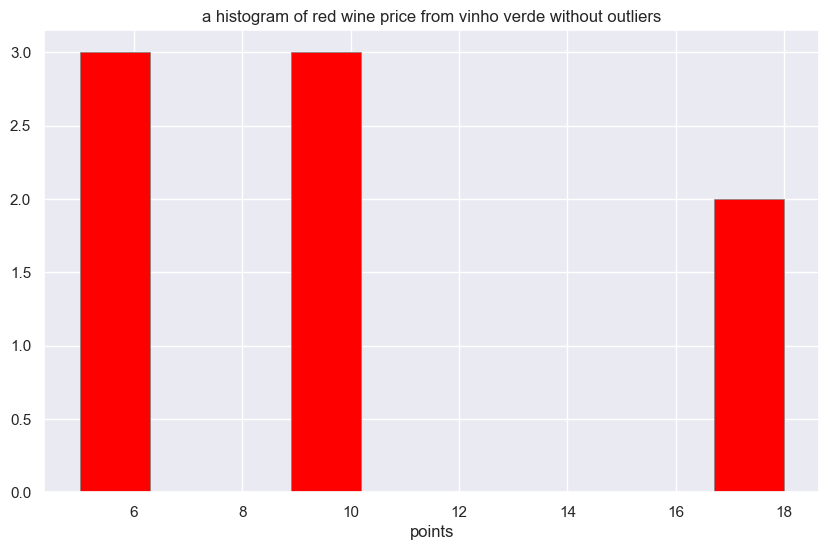

In [304]:
plt.figure(figsize=(10, 6))
plt.title("a histogram of red wine price from vinho verde without outliers")
plt.xlabel("points")

plt.hist(df_red["price"] , color='red',
         edgecolor='grey', linewidth=0.5)
plt.show() 

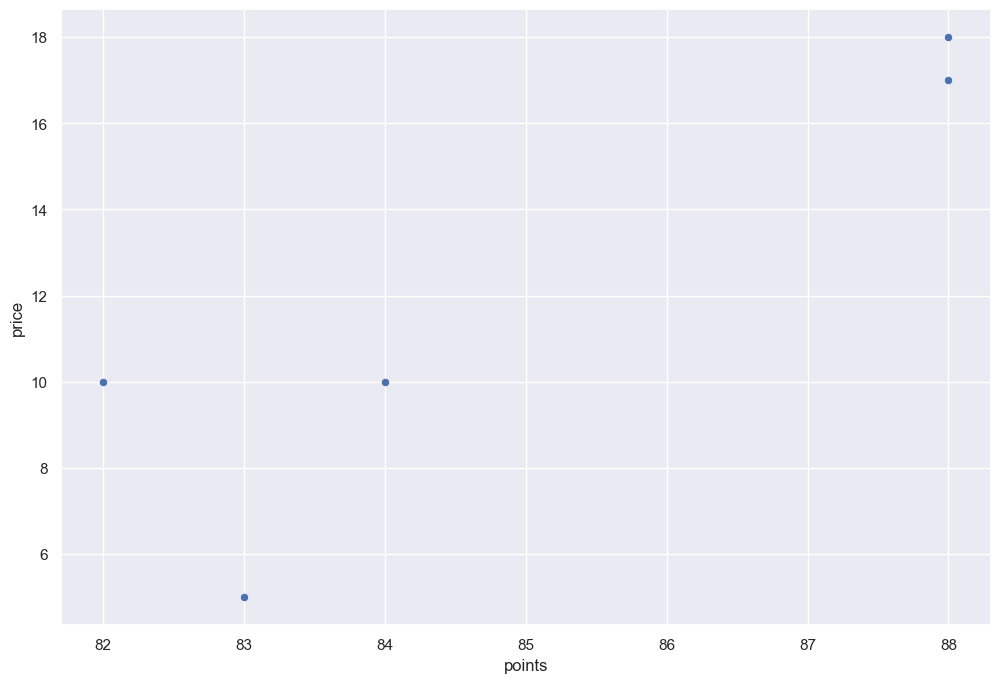

In [283]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "points", y = "price", data = df_red, )
plt.xlabel("points")
plt.ylabel("price")
plt.show()

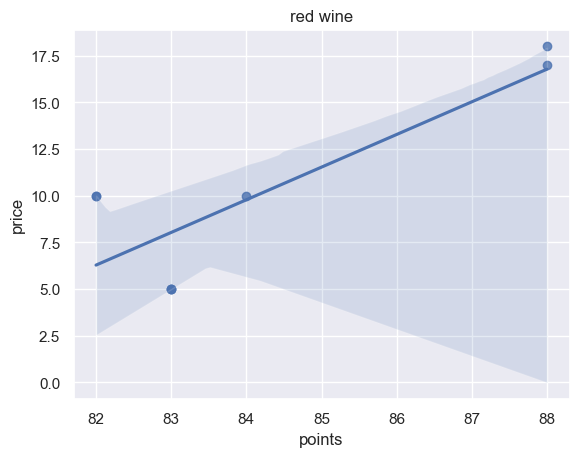

In [303]:
sns.regplot(x="points", y="price", data=df_red)
plt.title("red wine")
plt.show()

In [284]:
df_red["points"].value_counts()

83    3
82    2
88    2
84    1
Name: points, dtype: int64

In [248]:
(df_new["wine type"]).value_counts()

white     253
rose       32
red         8
"white      3
Name: wine type, dtype: int64